In [ ]:
# Variables that contains the user credentials to access Twitter API
access_token = ""
access_token_secret = ""
consumer_key = ""
consumer_secret = ""

In [ ]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import json

#This is a basic listener that just prints received tweets to stdout.
class MyListener(StreamListener):

    def on_data(self, data):
        try:
            with open('tweets.json', 'a') as f:
                f.write(data)
                dat = json.loads(data)
                print "%s %s" % (dat['created_at'], dat['text'])
                return True
        except BaseException as e:
            print("--> Error on_data: %s" % str(e))
            pass
        return True

    def on_error(self, status):
        print status

if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    twitter_stream = Stream(auth, MyListener())

    #This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
    twitter_stream.filter(track=['iPhone', 'Samsung Galaxy', 'Google Pixel', 'OnePlus', 'Google Nexus', 'LG G5', 'HTC', 'Huawei', 'Motorola Moto Play'])
    #twitter_stream.filter(track=['*'], languages=['th'])
    #twitter_stream.filter(track=['*'])
    

In [ ]:
import json
import sys

#fname = "tweets.json"
f = open(fname, 'r')
# f is the file pointer to the JSON data set
count = 1

# Tweets are stored in "fname"
with open(fname, 'r') as f:
    geo_data = {
        "type": "FeatureCollection",
        "features": []
    }
    tweets = []
    geo2 = []
    for line in f:
        count = count + 1
        if count%500 == 0:
            sys.stdout.write('.')
        if count%35000 == 0:
            sys.stdout.write('\n')
        tweet = json.loads(line)
        tweets.append(tweet)
        if tweet['coordinates']:
            geo_json_feature = {
                "type": "Feature",
                "geometry": tweet['coordinates'],
                "properties": {
                    "text": tweet['text'],
                    "created_at": tweet['created_at']
                }
            }
            geo_data['features'].append(geo_json_feature)
            geo2.append(tweet['coordinates'])
print '\nWait..'
# Save geo data
with open('geo_data.json', 'w') as fout:
    fout.write(json.dumps(geo_data, indent=4))
    
print 'Done..'

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import sys
tweets_data_path = 'C:\\Users\\mrbboomm\\Desktop\\Jupyter\\tweets(multilang).json'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
count = 0
for line in tweets_file:
    try:
        count = count + 1
        tweet = json.loads(line)
        tweets_data.append(tweet)
        if count%100 == 0:
            sys.stdout.write('.')
        if count%7000 == 0:
            sys.stdout.write('\n')
    except Exception as e:
        print e
        continue
print "\n%s tweets read." % (count)

......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......

In [7]:
tweets = pd.DataFrame()
print tweets

Empty DataFrame
Columns: []
Index: []


In [8]:
tweets['text'] = map(lambda tweet: tweet.get('text', None), tweets_data)
tweets['lang'] = map(lambda tweet: tweet.get('lang', None), tweets_data)
#tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet.get('place') != None else None, tweets_data)
tweets['country'] = map(lambda tweet: tweet['user']['location'] if tweet.get('user') != None else None, tweets_data)
tweets.head(1000)

,text,lang,country
0,RT @nutnicha_hippie: Huawei สร้างแบรนด์เก่งมาก...,th,Nakhonratchasima
1,RT @ShunJou: Huawei สร้างแบรนด์เก่งมาก ตอนนี้ใ...,th,Triangle
2,RT @ShunJou: Huawei สร้างแบรนด์เก่งมาก ตอนนี้ใ...,th,None
3,RT @ShunJou: Huawei สร้างแบรนด์เก่งมาก ตอนนี้ใ...,th,"Bangkok, Thailand"
4,RT @ShunJou: Huawei สร้างแบรนด์เก่งมาก ตอนนี้ใ...,th,ประเทศไทย
5,RT @tatartnr: ตะกี๊ dtac โทรมาถามว่าจะย้ายออกท...,th,None
6,RT @tatartnr: ตะกี๊ dtac โทรมาถามว่าจะย้ายออกท...,th,None
7,RT @mayflashfly: iPhone รุ่นแรก ยังไม่ได้แกะกล...,th,None
8,RT @tatartnr: ตะกี๊ dtac โทรมาถามว่าจะย้ายออกท...,th,"Bangkok, Thailand"
9,RT @ShunJou: Huawei สร้างแบรนด์เก่งมาก ตอนนี้ใ...,th,สีโทนเย็น


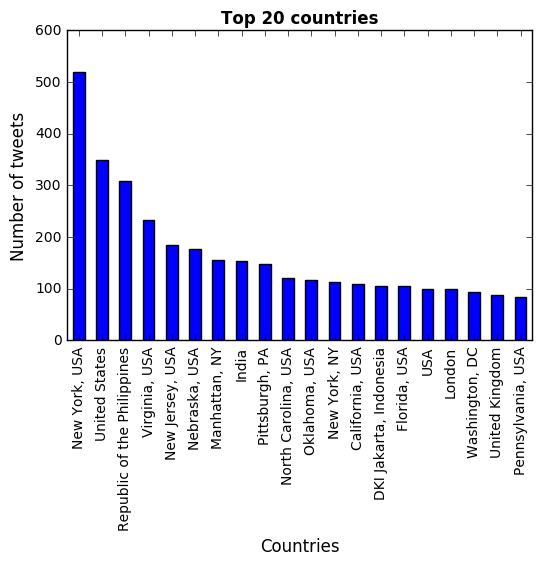

In [5]:
%matplotlib inline
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=12)
ax.set_ylabel('Number of tweets' , fontsize=12)
ax.set_title('Top 20 countries', fontsize=12, fontweight='bold')
tweets_by_country[:20].plot(ax=ax, kind='bar', color='blue')

In [11]:
import re
def word_in_text(word, text):
    try:
        word = word.lower()
        text = text.lower()
        match = re.search(word, text)
        if match:
            return 1
        return 0
    except:
        return 0


In [12]:
tweets['iPhone'] = tweets['text'].apply(lambda tweet: word_in_text('iPhone 7', tweet))
tweets['Samsung'] = tweets['text'].apply(lambda tweet: word_in_text('Samsung Galaxy',tweet))
tweets['Google Pixel'] = tweets['text'].apply(lambda tweet: word_in_text('Google Pixel', tweet))
tweets['OnePlus'] = tweets['text'].apply(lambda tweet: word_in_text('OnePlus', tweet))
tweets['Google Nexus'] = tweets['text'].apply(lambda tweet: word_in_text('Google Nexus',tweet))
tweets['LG'] = tweets['text'].apply(lambda tweet: word_in_text('LG', tweet))
tweets['HTC'] = tweets['text'].apply(lambda tweet: word_in_text('HTC',tweet))
tweets['Huawei'] = tweets['text'].apply(lambda tweet: word_in_text('Huawei', tweet))
tweets.head(1000)

,text,lang,country,iPhone,Samsung,Google Pixel,OnePlus,Google Nexus,LG,HTC,Huawei
0,RT @nutnicha_hippie: Huawei สร้างแบรนด์เก่งมาก...,th,Nakhonratchasima,0,0,0,0,0,0,0,1
1,RT @ShunJou: Huawei สร้างแบรนด์เก่งมาก ตอนนี้ใ...,th,Triangle,0,0,0,0,0,0,0,1
2,RT @ShunJou: Huawei สร้างแบรนด์เก่งมาก ตอนนี้ใ...,th,None,0,0,0,0,0,0,0,1
3,RT @ShunJou: Huawei สร้างแบรนด์เก่งมาก ตอนนี้ใ...,th,"Bangkok, Thailand",0,0,0,0,0,0,0,1
4,RT @ShunJou: Huawei สร้างแบรนด์เก่งมาก ตอนนี้ใ...,th,ประเทศไทย,0,0,0,0,0,0,0,1
5,RT @tatartnr: ตะกี๊ dtac โทรมาถามว่าจะย้ายออกท...,th,None,0,0,0,0,0,0,0,0
6,RT @tatartnr: ตะกี๊ dtac โทรมาถามว่าจะย้ายออกท...,th,None,0,0,0,0,0,0,0,0
7,RT @mayflashfly: iPhone รุ่นแรก ยังไม่ได้แกะกล...,th,None,0,0,0,0,0,0,0,0
8,RT @tatartnr: ตะกี๊ dtac โทรมาถามว่าจะย้ายออกท...,th,"Bangkok, Thailand",0,0,0,0,0,0,0,0
9,RT @ShunJou: Huawei สร้างแบรนด์เก่งมาก ตอนนี้ใ...,th,สีโทนเย็น,0,0,0,0,0,0,0,1


In [8]:
print "iPhone: " + str(tweets['iPhone'].value_counts()[1])
print "Samsung: " +  str(tweets['Samsung'].value_counts()[1])
print "Google Pixel: " + str(tweets['Google Pixel'].value_counts()[1])
print "OnePlus: " + str(tweets['OnePlus'].value_counts()[1])
print "Google Nexus: " + str(tweets['Google Nexus'].value_counts()[1])
print "LG: " + str(tweets['LG'].value_counts()[1])
print "HTC: " + str(tweets['HTC'].value_counts()[1])
print "Huawei: " + str(tweets['Huawei'].value_counts()[1])

iPhone: 2599
Samsung: 2080
Google Pixel: 952
OnePlus: 1744
Google Nexus: 149
LG: 489
HTC: 502
Huawei: 2125


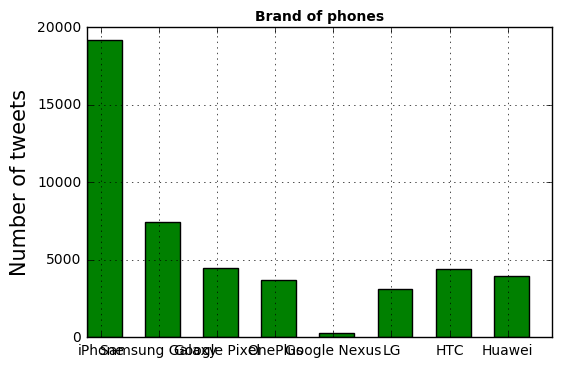

In [13]:
%matplotlib inline
keywords = ['iPhone', 'Samsung Galaxy', 'Google Pixel', 'OnePlus', 'Google Nexus', 'LG', 'HTC', 'Huawei']
tweets_by_keywords = [tweets['iPhone'].value_counts()[1], \
    tweets['Samsung'].value_counts()[1], \
    tweets['Google Pixel'].value_counts()[1], \
    tweets['OnePlus'].value_counts()[1], \
    tweets['Google Nexus'].value_counts()[1], \
    tweets['LG'].value_counts()[1], \
    tweets['Huawei'].value_counts()[1], \
    tweets['HTC'].value_counts()[1]]

x_pos = list(range(len(keywords)))
width = 0.6
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_keywords, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Brand of phones',\
             fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(keywords)
plt.grid()

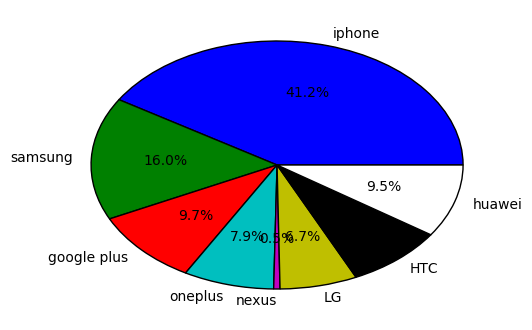

In [14]:
iphone = tweets['iPhone'].value_counts()[1]
samsung = tweets['Samsung'].value_counts()[1]
google =  tweets['Google Pixel'].value_counts()[1]
oneplus =  tweets['OnePlus'].value_counts()[1]
nexus =  tweets['Google Nexus'].value_counts()[1]
lg = tweets['LG'].value_counts()[1]
htc = tweets['HTC'].value_counts()[1]
huawei = tweets['Huawei'].value_counts()[1] 
lbls = ['iphone', 'samsung', 'google plus', 'oneplus', 'nexus', 'LG', 'HTC', 'huawei']
sizes = [iphone,samsung,google,oneplus,nexus,lg,htc,huawei]
plt.pie(sizes, labels=lbls, autopct='%1.1f%%')
plt.show()

In [15]:
df[0:100]

NameError: name 'df' is not defined

In [16]:
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    if type(text) == unicode:
        match = re.search(regex, text)
        if match:
            return match.group()
        else:
            return "not match"
    else:
        return "wrong type"

In [20]:
tweets['text']

0         RT @nutnicha_hippie: Huawei สร้างแบรนด์เก่งมาก...
1         RT @ShunJou: Huawei สร้างแบรนด์เก่งมาก ตอนนี้ใ...
2         RT @ShunJou: Huawei สร้างแบรนด์เก่งมาก ตอนนี้ใ...
3         RT @ShunJou: Huawei สร้างแบรนด์เก่งมาก ตอนนี้ใ...
4         RT @ShunJou: Huawei สร้างแบรนด์เก่งมาก ตอนนี้ใ...
5         RT @tatartnr: ตะกี๊ dtac โทรมาถามว่าจะย้ายออกท...
6         RT @tatartnr: ตะกี๊ dtac โทรมาถามว่าจะย้ายออกท...
7         RT @mayflashfly: iPhone รุ่นแรก ยังไม่ได้แกะกล...
8         RT @tatartnr: ตะกี๊ dtac โทรมาถามว่าจะย้ายออกท...
9         RT @ShunJou: Huawei สร้างแบรนด์เก่งมาก ตอนนี้ใ...
10        RT @ShunJou: Huawei สร้างแบรนด์เก่งมาก ตอนนี้ใ...
11        RT @ShunJou: Huawei สร้างแบรนด์เก่งมาก ตอนนี้ใ...
12        RT @RamengKiki: วันนี้ก็จะมาสอนคุมโทนDark🌑กัน...
13        RT @ShunJou: Huawei สร้างแบรนด์เก่งมาก ตอนนี้ใ...
14        RT @ShunJou: Huawei สร้างแบรนด์เก่งมาก ตอนนี้ใ...
15        RT @ShunJou: Huawei สร้างแบรนด์เก่งมาก ตอนนี้ใ...
16        RT @ShunJou: Huawei สร้างแบรนด์

In [ ]:
tweets['link'] = (tweets['text']).apply(lambda tweet: extract_link(tweet))
tweets['link']

In [69]:
tweets

,text,lang,country,iPhone,Samsung,Google Pixel,OnePlus,Google Nexus,LG,HTC,Huawei,link
0,DACOM Armor Bluetooth Earphone Stereo Headset ...,en,"Manhattan, NY",0,0,0,0,0,0,0,0,https://t.co/wPsdEiWCOx
1,RT @krixz6339: @OnePlus_IN @oneplus @Vikas_AGL...,en,"Mumbai, India",0,0,0,1,0,0,0,0,https://t.co/ht1GhJx8vr
2,https://t.co/h2RKhHinDC HUGE IPHONE 7 GIVEAWAY...,en,None,1,0,0,0,0,0,0,0,https://t.co/h2RKhHinDC
3,Apple iPhone 4s - 16GB - Black (Unlocked) Veri...,en,"Virginia, USA",0,0,0,0,0,0,0,0,https://t.co/3LKjsFnkoW
4,LED Light Up Selfie Luminous Phone Back Case C...,en,None,0,0,0,0,0,0,0,0,https://t.co/2rDpbWg2rs
5,"Like a bitch? ! Push,don't be shy https://...",en,None,0,0,0,0,0,0,0,0,https://t.co/dKGymwYCh9
6,RT @davidfrum: So the Russians voted for Trump...,en,"Holly Springs, NC",0,0,0,0,0,0,0,0,https://t.co/IIK…
7,Google Pixel XL International Giveaway @androi...,en,None,0,0,1,0,0,0,0,0,https://t.co/oIvkXJjzem
8,https://t.co/C1VU3YPpch HUGE IPHONE 7 GIVEAWAY...,en,None,1,0,0,0,0,0,0,0,https://t.co/C1VU3YPpch
9,LED Light Up Selfie Luminous Phone Back Case C...,en,None,0,0,0,0,0,0,0,0,https://t.co/57StHO0kXa
